** 3.3 CartPoleの状態を離散化してみる **

# 使用するパッケージの宣言

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

# 定数の設定

In [ ]:
ENV = 'CartPole-v0'  # 使用する課題名

In [2]:
NUM_DIZITIZED = 6  # 各状態の離散値への分割数

# CartPoleを実行してみる

## 実行する課題を設定

In [ ]:
env = gym.make(ENV)  # 実行する課題を設定

環境は4変数で表される。p81にあるようにこの4変数は以下に対応する

- カート位置（-2.4から2.4)
- カート速度（-Inf to Inf)
- 棒の角度 (-41.8 to 41.8)
- 棒の角速度(-Inf to Inf)

## 環境初期化

env.resetは

```
Resets the state of the environment and returns an initial observation.
```

In [23]:
observation = env.reset()  # 環境の初期化

In [24]:
observation

array([-0.03042836, -0.01643986, -0.00663527, -0.04772749])

## 離散化の閾値を求める

In [9]:
def bins(clip_min, clip_max, num):
    '''観測した状態（連続値）を離散値にデジタル変換する閾値を求める'''
    return np.linspace(start = clip_min, stop = clip_max, num = num + 1)[1:-1]

In [11]:
bins(-2.4,2.4 ,NUM_DIZITIZED)

array([-1.6, -0.8,  0. ,  0.8,  1.6])

In [6]:
np.linspace(-2.4, 2.4, 6 + 1)

array([-2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4])

In [ ]:
np.linspace(-2.4, 2.4, 6 + 1)[1:-1]

## 観測したobservation状態を、離散値に変換する

4つの離散値（NUM_DIZITIZEDが６ならそれぞれ6値）が得られるので、6進数的にコーディングする

In [27]:
def digitize_state(observation):
    '''観測したobservation状態を、離散値に変換する'''
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]
    return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])


In [28]:
digitize_state(observation)

518

# 色々試してみる

## actionは右にちょっと動かすか左にちょっと動かすかの二択？

In [39]:
env.action_space

Discrete(2)

具体的には0,1の二値

In [49]:
env.action_space.sample()

1

## env.stepでワンステップ進む

In [53]:
env.step(0)

(array([-0.0551473 , -0.79679168,  0.02442904,  1.1201209 ]), 1.0, False, {})

In [57]:
env.step(1)

(array([-0.09554146, -0.01938966,  0.08039949,  0.01737313]), 1.0, False, {})

## rendering　（オブジェクト指向に書いた。お勧め）

In [79]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [80]:
ax = fig.add_subplot("111")

ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [81]:
ax.imshow(env.render(mode = 'rgb_array'))

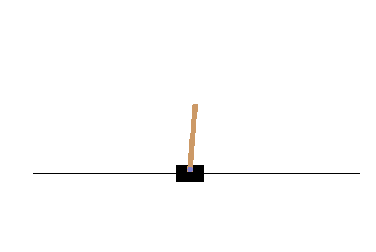

In [82]:
fig

## rendering explained in non-object oriented manner (非推奨）
explained [here](https://gist.github.com/andrewschreiber/e9a21bba9c604a790e605fbacd3f4109)

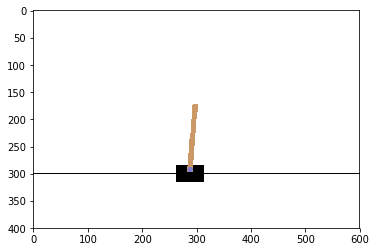

In [66]:
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))

In [59]:
env.render()

True

## randomに動かしながら静止画を表示してみよう

In [86]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [88]:
ax = fig.add_subplot("111")

ax.axis('off')


(0.0, 1.0, 0.0, 1.0)

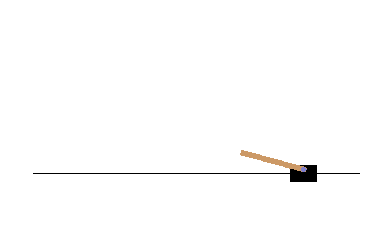

In [116]:
for i in range(10):
    env.step(env.action_space.sample())
ax.imshow(env.render(mode = 'rgb_array'))

fig

# sandbox

In [117]:
##bash
git commit -a -m "leaving starbucks"

SyntaxError: invalid syntax (<ipython-input-117-1c86fcf8e5bf>, line 2)

In [32]:
cart_pos, cart_v, pole_angle, pole_v = observation
digitized = [
    np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
    np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
    np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
    np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]

In [45]:
cart_pos

-0.04501883904139853

In [46]:
bins(-2.4, 2.4, NUM_DIZITIZED)

array([-1.6, -0.8,  0. ,  0.8,  1.6])

In [55]:
np.array([1,1]).shape

(2,)

In [65]:
np.array([4,3,2]).shape

(3,)

In [67]:
type(np.array([4,3,2]))

numpy.ndarray

In [66]:
np.ndarray([4,3,2]).shape

(4, 3, 2)

In [68]:
type(np.ndarray([4,3,2]))

numpy.ndarray

In [44]:
(np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)))

()

In [12]:
?np.linspace

In [11]:
np.linspace(

array([-2.        ,  0.66666667,  3.33333333,  6.        ])

In [15]:
bins(-2,2,5)

array([-1.2, -0.4,  0.4,  1.2])

In [17]:
observation

array([ 0.00755673,  0.02323561,  0.00788667, -0.03122374])

In [24]:
?np.digitize

In [25]:
np.digitize(3 , 3)

ValueError: object of too small depth for desired array

In [69]:
%%bash
git commit -a -m "leaving 3_3"

[master 13465fe] leaving 3_3
 4 files changed, 11508 insertions(+), 592 deletions(-)
